In [24]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

## bands information

https://gisgeography.com/sentinel-2-bands-combinations/

similar gradient appearing in all bands

=> some normalization help like ndvi


## NDVI

/home/fd/.pyenv/versions/3.7.9/envs/lwgcp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/fd/.pyenv/versions/3.7.9/envs/lwgcp/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


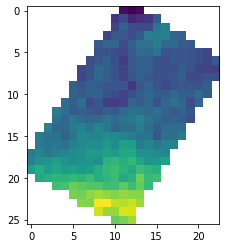

<AxesSubplot:>

In [40]:
# # compute ndvi
# ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

# show(ndvi)

In [30]:
# np.median(ndvi)

nan

In [48]:
# ndvi_ = np.nan_to_num(ndvi, nan=-1)
# ndvi_values =np.array([x for x in ndvi_.flatten() if x != -1])
# ndvi_values.mean(),ndvi_values.var()

(0.07305155739191983, 0.00015604188642669652)

## moisture index

/home/fd/.pyenv/versions/3.7.9/envs/lwgcp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


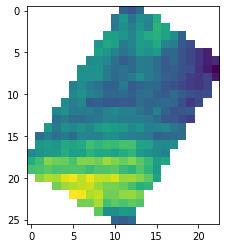

<AxesSubplot:>

In [51]:
# # moisture index
# mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))

# show(mi)

# Visualize Data Rice Fields

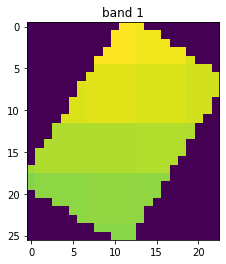

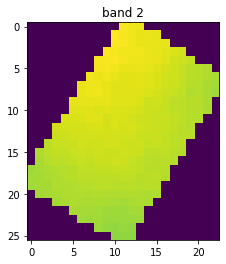

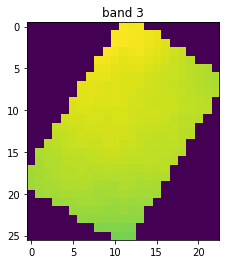

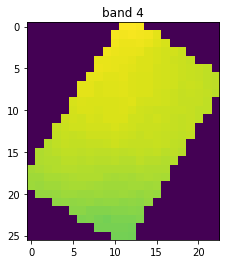

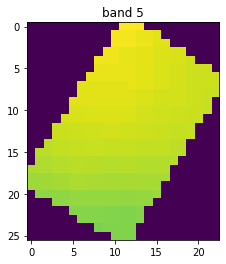

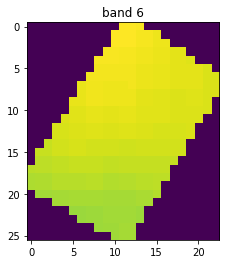

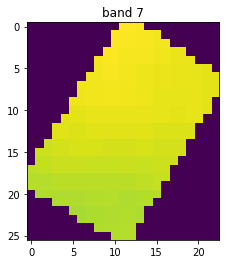

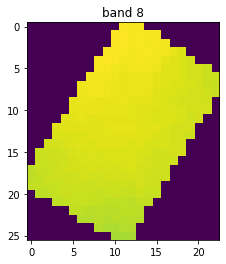

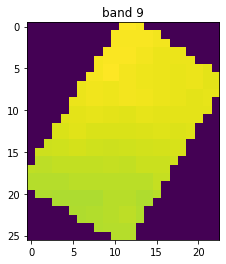

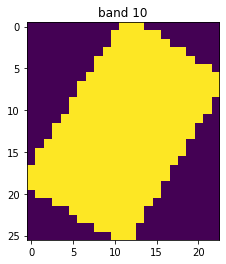

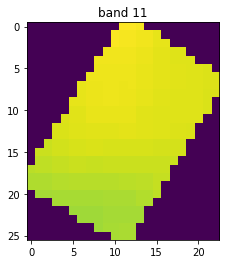

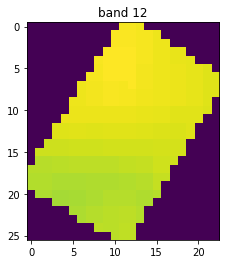

23
26


In [12]:
fp = r'../raw_data/dongdung/id_6077a741f85c5e001b86fd52_all_bands_2021-01-05.tif'
img = rasterio.open(fp)
for i in range(1,13):
    plt.title(f"band {i}")
    show(img.read(i))
    
print(img.width)
print(img.height)

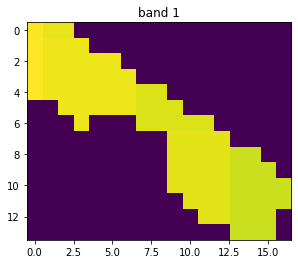

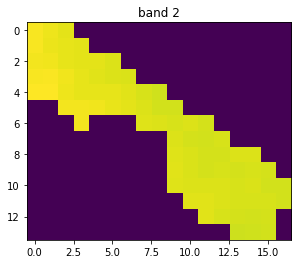

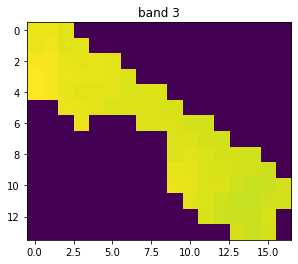

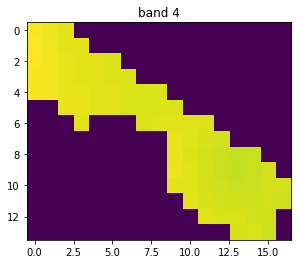

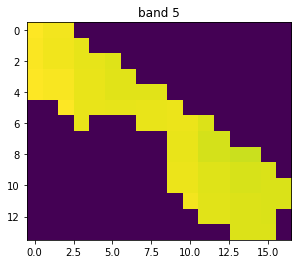

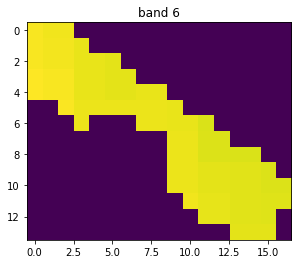

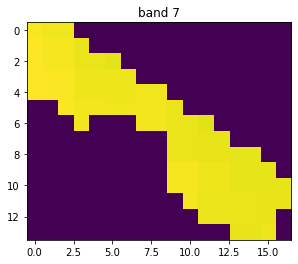

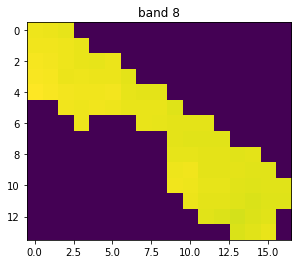

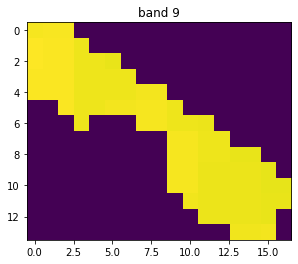

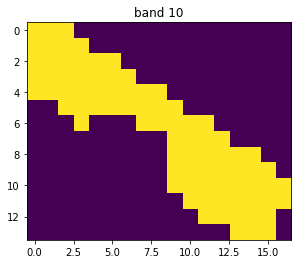

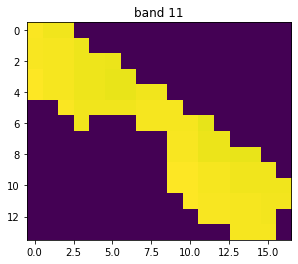

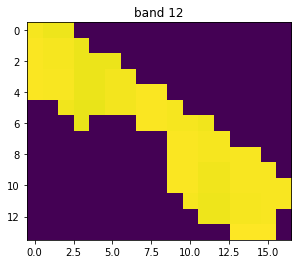

17
14


In [19]:
fp = r'../raw_data/dongdung/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
img = rasterio.open(fp)
for i in range(1,13):
    plt.title(f"band {i}")
    show(img.read(i))
    
print(img.width)
print(img.height)


In [11]:
print(img.width)
print(img.height)

25
17


In [17]:
bands[0].shape

(17, 25)

In [101]:
fp = r'../raw_data/supan/Name_Suphanburi_true_2021-01-04.png'
img = rasterio.open(fp)
for i in range(1,13):
    plt.title(f"band {i}")
    show(img.read(i))
    
print(img.width)
print(img.height)
print(img.count)
a = img.read(i)
a.shape

RasterioIOError: ../raw_data/supan/Name_Suphanburi_true_2021-01-04.png: No such file or directory

In [27]:
img.count

4

In [28]:
array = img.read()
stats = []
for band in array:
    stats.append({
          'min': band.min(),
           'mean': band.mean(),
           'median': np.median(band),
         'max': band.max()})

In [29]:
stats

[{'min': 31, 'mean': 84.16945466711275, 'median': 84.0, 'max': 162},
 {'min': 40, 'mean': 81.11676145868184, 'median': 79.0, 'max': 151},
 {'min': 29, 'mean': 69.89444630311141, 'median': 68.0, 'max': 136},
 {'min': 255, 'mean': 255.0, 'median': 255.0, 'max': 255}]

(array([1625., 6623., 6094., 2946.,  629.,   17.,    0.,    0.,    0.,
        5978.]),
 array([ 29. ,  51.6,  74.2,  96.8, 119.4, 142. , 164.6, 187.2, 209.8,
        232.4, 255. ]),
 <BarContainer object of 10 artists>)

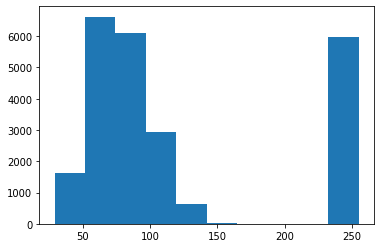

In [32]:
import matplotlib.pyplot as plt
plt.hist(img.read().flatten(), alpha = 1)

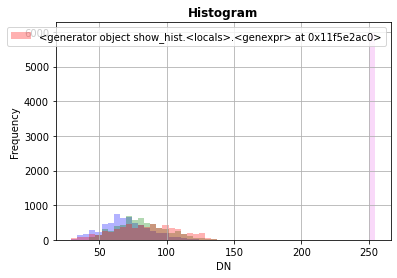

In [33]:
from rasterio.plot import show_hist
show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,
     histtype='stepfilled', title="Histogram")

In [35]:
band4= img.read(4)

In [36]:
band4.shape

(61, 98)

In [38]:
img.bounds

BoundingBox(left=0.0, bottom=61.0, right=98.0, top=0.0)

In [39]:
img.tags()

{}

In [94]:
import glob
import matplotlib.pyplot as plt
files_s = glob.glob("../raw_data/supan/*.tif")
for file in files_s:
    print(file)
    img = rasterio.open(file)
    for i in range(1,13):
        plt.title(f"band {i}")
        show(img.read(i))

In [97]:
shape(img.read(i))

NameError: name 'shape' is not defined

In [139]:
def create_dataset(folders, n = None): 
    X = []
    y = []
    dates =[]
    file_ids = []
    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
#             array = img.read()
#             b_dict['band1']
            b_dict = {'date':date,'file_id':file_id,'y': folder}
            for band in range(1,13):
                b_dict[band] = img.read(band).flatten()
                
            X.append(b_dict)
# #             y.append(folder)
            
#             dates.append(date)
#             file_ids.append(file_id)
            
            img.close()
#     data = {'X':X,'date': dates,'file_ids':file_ids,'y': y}
    df = pd.DataFrame(X) 
    return df

In [138]:
df.X[0].shape

(3094,)

In [140]:
folders = ['rice_dongdung_1year', 'sugarcane_korat']
df = create_dataset(folders, n = 5)
df

,date,file_id,y,1,2,3,4,5,6,7,8,9,10,11,12
0,2020-07-29,id_6094bb4df85c5e001b870910,rice_dongdung_1year,"[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[902, 947, 992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1126, 1176, 1234, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1062, 1116, 1316, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1585, 1806, 1806, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2474, 2432, 2432, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2773, 2853, 2853, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2612, 2646, 2764, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2842, 3167, 3167, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4668, 4606, 4606, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1946, 2665, 2665, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1314, 1830, 1830, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-12-11,id_60a09545f85c5e001b8714ba,rice_dongdung_1year,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-07-29,id_6094f7b0f85c5e001b870a58,rice_dongdung_1year,"[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 624, 602, 633, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 768, 709, 695, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 562, 502, 494, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1086, 974, 974, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 2062, 1993, 1993, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2632, 2559, 2559, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2280, 2162, 2128, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2800, 2774, 2774, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 2346, 3120, 3120, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1217, 1135, 1135, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 663, 650, 650, 0, 0, 0, 0, 0, ..."
3,2021-05-05,id_6077a741f85c5e001b86fd52,rice_dongdung_1year,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 53...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 716, 761, 75...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 887, 988, 91...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 862, 885, 81...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1233, 1233, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1193, 1193, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1295, 1295, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1246, 1208, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1270, 1270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1064, 1064, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1027, 1027, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 768, 768, 58..."
4,2020-10-27,id_6094ba1df85c5e001b8708f8,rice_dongdung_1year,"[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 6264, 6264, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5756, 5756, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5196, 5156, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5685, 5548, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5065, 4961, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4697, 4614, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5384, 5356, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 4304, 4211, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 15941, 15941, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 2122, 2082, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2149, 2093, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2021-06-28,id_6054a1b458a7cd004800098f,sugarcane_korat,"[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0, 237...","[2358, 2348, 2202, 0, 0, 0, 0, 0, 0, 0, 0, 236...","[2430, 2344, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 243...","[2180, 2200, 2250, 0, 0, 0, 0, 0, 0, 0, 0, 218...","[2729, 2729, 2728, 0, 0, 0, 0, 0, 0, 0, 0, 270...","[3540, 3540, 3547, 0, 0, 0, 0, 0, 0, 0, 0, 358...","[3912, 3912, 3862, 0, 0, 0, 0, 0, 0, 0, 0, 394...","[3838, 3816, 3728, 0, 0, 0, 0, 0, 0, 0, 0, 389...","[4084, 4084, 4045, 0, 0, 0, 0, 0, 0, 0, 0, 412...","[8700,

In [120]:
# # field, date, mean_11, std_1, mean2,std_2 etc.
# def caculate(array):
#     for band in array:
#         print(band)
#         b_min = band.min()
#         b_mean = band.mean()
#         b_median= np.median(band)
#         b_max = band.max()
#         print(b_max)

In [126]:
def caculate(array):
    for band in array:
        b_mean = band.mean()

In [134]:
df.X.shape

(10,)

In [127]:
df['mean'] = df['X'].apply(caculate)
df

,X,date,file_ids,y,mean
0,"[[[938, 865, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2020-07-29,id_6094bb4df85c5e001b870910,rice_dongdung_1year,None
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2020-12-11,id_60a09545f85c5e001b8714ba,rice_dongdung_1year,None
2,"[[[0, 0, 0, 0, 0, 577, 907, 907, 0, 0, 0, 0], ...",2020-07-29,id_6094f7b0f85c5e001b870a58,rice_dongdung_1year,None
3,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, ...",2021-05-05,id_6077a741f85c5e001b86fd52,rice_dongdung_1year,None
4,"[[[0, 0, 0, 5249, 5249, 0, 0, 0, 0, 0, 0, 0, 0...",2020-10-27,id_6094ba1df85c5e001b8708f8,rice_dongdung_1year,None
5,"[[[2372, 2372, 2372, 0, 0, 0, 0, 0, 0, 0, 0], ...",2021-06-28,id_6054a1b458a7cd004800098f,sugarcane_korat,None
6,"[[[0, 0, 5759, 5759, 5759, 5894, 5894, 0, 0, 0...",2020-07-13,id_6054a1b458a7cd004800099b,sugarcane_korat,None
7,"[[[1223, 1223, 1223, 1223, 582, 582, 582, 582,...",2021-05-14,id_6054a1b458a7cd00480009a4,sugarcane_korat,None
8,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 354,...",2021-02-25,id_6054a1b558a7cd00480009e0,sugarcane_korat,None
9,"[[[0, 0, 0, 0, 0, 0, 0, 672, 672, 672, 672, 67...",2020-10-06,id_6054a1b558a7cd00480009da,sugarcane_korat,None


In [124]:
a = caculate(df.X[0])

[[938 865 865   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [940 968 968 968   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [940 968 968 968 968 968   0   0   0   0   0   0   0   0   0   0   0]
 [940 968 968 968 968 968 968   0   0   0   0   0   0   0   0   0   0]
 [940 968 968 968 968 968 968 961 961   0   0   0   0   0   0   0   0]
 [  0   0 968 968 968 968 968 961 961 961   0   0   0   0   0   0   0]
 [  0   0   0 968   0   0   0 961 961 961 961 961   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 825 825 825 825   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 825 825 825 825 810 810   0   0]
 [  0   0   0   0   0   0   0   0   0 825 825 825 825 810 810 810   0]
 [  0   0   0   0   0   0   0   0   0 825 825 825 825 810 810 810 810]
 [  0   0   0   0   0   0   0   0   0   0 825 825 825 810 810 810 810]
 [  0   0   0   0   0   0   0   0   0   0   0 825 825 810 810 810   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 728 728 728   0]]
968
[

NoneType

In [92]:
df.X[0].shape

(13, 14, 17)

In [115]:
df.X[0]

array([[[ 938,  865,  865, ...,    0,    0,    0],
        [ 940,  968,  968, ...,    0,    0,    0],
        [ 940,  968,  968, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,  810,  810,  810],
        [   0,    0,    0, ...,  810,  810,    0],
        [   0,    0,    0, ...,  728,  728,    0]],

       [[ 902,  947,  992, ...,    0,    0,    0],
        [ 904,  854,  891, ...,    0,    0,    0],
        [ 949,  904,  892, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,  836,  847,  866],
        [   0,    0,    0, ...,  797,  825,    0],
        [   0,    0,    0, ...,  807,  826,    0]],

       [[1126, 1176, 1234, ...,    0,    0,    0],
        [1156, 1076, 1100, ...,    0,    0,    0],
        [1242, 1208, 1172, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ..., 1148, 1178, 1228],
        [   0,    0,    0, ..., 1134, 1164,    0],
        [   0,    0,    0, ..., 1130, 1158,    0]],

       ...,

       [[1946, 2665, 266

In [109]:
mean_1 = np.mean(df.X[0][0])
mean_1
mean_2 = np.mean(df.X[0][1])
mean_2

226.11764705882354

In [87]:
import os
for folder in folders:
    files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
    for file in files_s:
        filename = os.path.basename(f"../raw_data/{folder}/{file}")
        file_id, date = filename.split('_all_bands_')
        print(file_id)
        date = date.replace('.tif','')
        print(date)
#         df[file_id] = file_id
#         df[date] = date
df

id_609ded90f85c5e001b871242
2021-01-30
id_609debfcf85c5e001b87122b
2021-01-15
id_6094ba1df85c5e001b8708f8
2021-01-15
id_6094bc2cf85c5e001b870918
2021-01-15
id_60a098fbf85c5e001b8714db
2021-01-15
id_6094b923f85c5e001b8708eb
2021-01-15
id_609ded90f85c5e001b871242
2021-01-25
id_609dd39af85c5e001b8711bf
2021-01-05
id_60a09545f85c5e001b8714ba
2021-01-25
id_60a09200f85c5e001b871496
2021-01-20
id_6094f9e4f85c5e001b870a67
2021-01-20
id_60a09545f85c5e001b8714ba
2021-01-30
id_6094c0dcf85c5e001b870958
2021-01-15
id_6094bb4df85c5e001b870910
2021-01-15
id_6094f7b0f85c5e001b870a58
2021-01-15
id_609dd39af85c5e001b8711bf
2021-01-10
id_6094bb4df85c5e001b870910
2021-01-05
id_6094f7b0f85c5e001b870a58
2021-01-05
id_6094c0dcf85c5e001b870958
2021-01-05
id_6094f9e4f85c5e001b870a67
2021-01-30
id_60a09545f85c5e001b8714ba
2021-01-20
id_60a09200f85c5e001b871496
2021-01-30
id_60a09200f85c5e001b871496
2021-01-25
id_6094f9e4f85c5e001b870a67
2021-01-25
id_6094c0dcf85c5e001b870958
2021-01-10
id_6094bb4df85c5e001b8709

id_6054a1b558a7cd00480009e6
2021-05-24
id_6054a1b558a7cd00480009bf
2020-08-02
id_6054a1b458a7cd004800099b
2020-12-30
id_6054a1b558a7cd00480009d7
2020-12-22
id_6054a1b458a7cd00480009a7
2020-12-02
id_6054a1b558a7cd00480009bc
2020-10-06
id_6054a1b558a7cd00480009c8
2021-02-05
id_6054a1b558a7cd00480009c2
2021-02-25
id_6054a1b558a7cd00480009d4
2020-11-20
id_6054a1b558a7cd00480009da
2021-04-06
id_6054a1b558a7cd00480009da
2021-03-27
id_6054a1b558a7cd00480009c8
2021-05-24
id_6054a1b558a7cd00480009c2
2021-05-04
id_6054a1b558a7cd00480009c5
2021-04-16
id_6054a1b558a7cd00480009e3
2020-12-12
id_6054a1b558a7cd00480009ad
2020-10-06
id_6054a1b558a7cd00480009b6
2021-02-15
id_6054a1b558a7cd00480009e0
2020-11-10
id_6054a1b558a7cd00480009aa
2021-05-09
id_6054a1b558a7cd00480009ce
2021-03-22
id_6054a1b558a7cd00480009b3
2020-10-13
id_6054a1b558a7cd00480009bf
2021-05-21
id_6054a1b458a7cd0048000992
2020-12-25
id_6054a1b458a7cd0048000998
2020-12-05
id_6054a1b558a7cd00480009bf
2021-02-28
id_6054a1b558a7cd00480009

2021-04-11
id_6054a1b558a7cd00480009b9
2021-01-04
id_6054a1b558a7cd00480009b3
2021-01-24
id_6054a1b458a7cd004800098f
2020-07-18
id_6054a1b558a7cd00480009bc
2021-04-01
id_6054a1b458a7cd00480009a7
2021-06-05
id_6054a1b558a7cd00480009b6
2020-11-27
id_6054a1b558a7cd00480009e9
2021-01-14
id_6054a1b558a7cd00480009da
2020-10-01
id_6054a1b458a7cd004800098f
2021-01-26
id_6054a1b458a7cd004800099b
2021-06-23
id_6054a1b558a7cd00480009ad
2021-03-20
id_6054a1b558a7cd00480009d7
2021-06-25
id_6054a1b558a7cd00480009e9
2020-09-13
id_6054a1b558a7cd00480009ad
2021-04-29
id_6054a1b458a7cd004800098f
2020-09-21
id_6054a1b558a7cd00480009d7
2021-01-04
id_6054a1b558a7cd00480009c2
2020-11-17
id_6054a1b558a7cd00480009ad
2021-04-01
id_6054a1b458a7cd004800099b
2021-01-16
id_6054a1b458a7cd004800098f
2021-06-13
id_6054a1b458a7cd004800099b
2020-07-28
id_6054a1b458a7cd004800099e
2020-08-17
id_6054a1b458a7cd00480009a7
2020-09-23
id_6054a1b558a7cd00480009bc
2021-04-29
id_6054a1b558a7cd00480009d7
2020-09-03
id_6054a1b458a

2021-02-03
id_6054a1b558a7cd00480009e6
2021-01-21
id_6054a1b558a7cd00480009bf
2021-04-14
id_6054a1b558a7cd00480009b9
2020-11-12
id_6054a1b458a7cd0048000995
2020-12-02
id_6054a1b458a7cd00480009a1
2021-05-06
id_6054a1b558a7cd00480009e6
2021-01-09
id_6054a1b558a7cd00480009d1
2021-02-13
id_6054a1b458a7cd004800098c
2020-09-08
id_6054a1b458a7cd004800098c
2020-07-25
id_6054a1b558a7cd00480009cb
2021-04-24
id_6054a1b558a7cd00480009e6
2020-07-23
id_6054a1b558a7cd00480009aa
2021-04-14
id_6054a1b558a7cd00480009dd
2020-10-28
id_6054a1b458a7cd004800098c
2020-07-30
id_6054a1b558a7cd00480009e6
2021-06-15
id_6054a1b558a7cd00480009bf
2021-03-20
id_6054a1b558a7cd00480009bf
2021-04-29
id_6054a1b558a7cd00480009aa
2021-04-01
id_6054a1b458a7cd004800098c
2021-06-13
id_6054a1b558a7cd00480009aa
2021-04-29
id_6054a1b558a7cd00480009cb
2021-04-19
id_6054a1b458a7cd004800098c
2020-09-21
id_6054a1b558a7cd00480009b0
2020-12-25
id_6054a1b558a7cd00480009aa
2021-03-20
id_6054a1b558a7cd00480009cb
2021-03-10
id_6054a1b558a

id_6054a1b458a7cd004800098c
2021-03-30
id_6054a1b558a7cd00480009cb
2020-09-01
id_6054a1b558a7cd00480009aa
2020-07-08
id_6054a1b558a7cd00480009ce
2020-08-07
id_6054a1b458a7cd0048000998
2020-11-27
id_6054a1b458a7cd0048000992
2020-11-07
id_6054a1b558a7cd00480009cb
2021-01-06
id_6054a1b558a7cd00480009bf
2021-06-03
id_6054a1b558a7cd00480009e0
2020-09-16
id_6054a1b558a7cd00480009d4
2021-01-09
id_6054a1b458a7cd00480009a4
2020-07-03
id_6054a1b458a7cd004800099b
2021-05-04
id_6054a1b458a7cd004800099e
2021-04-16
id_6054a1b558a7cd00480009e3
2021-02-13
id_6054a1b558a7cd00480009d7
2021-05-16
id_6054a1b558a7cd00480009e0
2021-01-11
id_6054a1b458a7cd004800098f
2021-02-15
id_6054a1b558a7cd00480009d4
2020-07-23
id_6054a1b458a7cd00480009a4
2021-06-20
id_6054a1b458a7cd00480009a4
2021-01-29
id_6054a1b558a7cd00480009e0
2021-06-18
id_6054a1b558a7cd00480009ad
2020-08-14
id_6054a1b458a7cd00480009a4
2021-01-01
id_6054a1b558a7cd00480009e0
2021-06-30
id_6054a1b558a7cd00480009e9
2021-05-06
id_6054a1b558a7cd00480009

id_6054a1b458a7cd0048000992
2020-11-12
id_6054a1b558a7cd00480009b0
2020-10-26
id_6054a1b558a7cd00480009ce
2020-08-12
id_6054a1b558a7cd00480009cb
2020-07-05
id_6054a1b558a7cd00480009cb
2020-09-28
id_6054a1b558a7cd00480009aa
2020-09-18
id_6054a1b558a7cd00480009d1
2020-08-02
id_60628e67f85c5e001b86ec15
2020-11-27
id_6054a1b458a7cd0048000995
2020-10-28
id_6054a1b458a7cd00480009a1
2020-08-22
id_6054a1b458a7cd004800098c
2021-04-04
id_6054a1b558a7cd00480009ec
2020-11-30
id_6054a1b558a7cd00480009e6
2021-04-16
id_6054a1b558a7cd00480009bc
2020-11-20
id_6054a1b558a7cd00480009b6
2021-04-06
id_6054a1b458a7cd0048000989
2021-01-01
id_6054a1b558a7cd00480009d4
2020-10-06
id_6054a1b458a7cd004800099e
2020-12-10
id_6054a1b458a7cd0048000989
2021-06-08
id_6054a1b458a7cd0048000989
2020-09-06
id_6054a1b458a7cd00480009a4
2020-10-26
id_6054a1b558a7cd00480009c2
2021-03-17
id_6054a1b558a7cd00480009c5
2021-02-05
id_6054a1b558a7cd00480009c5
2021-05-24
id_6054a1b558a7cd00480009ad
2020-11-20
id_6054a1b558a7cd00480009

2020-09-28
id_6054a1b558a7cd00480009e6
2021-06-20
id_6054a1b558a7cd00480009bf
2021-03-15
id_6054a1b558a7cd00480009e6
2021-06-08
id_6054a1b558a7cd00480009b3
2020-11-12
id_6054a1b558a7cd00480009e6
2021-01-01
id_6054a1b558a7cd00480009ce
2021-02-23
id_6054a1b458a7cd00480009a1
2021-05-26
id_6054a1b458a7cd0048000995
2020-12-22
id_6054a1b558a7cd00480009d1
2021-05-06
id_6054a1b558a7cd00480009b0
2020-12-10
id_6054a1b558a7cd00480009aa
2021-03-15
id_6054a1b558a7cd00480009cb
2021-03-25
id_6054a1b558a7cd00480009e6
2020-09-06
id_6054a1b558a7cd00480009c8
2021-01-29
id_6054a1b558a7cd00480009c2
2021-01-09
id_6054a1b558a7cd00480009b6
2020-09-16
id_6054a1b558a7cd00480009c8
2021-06-20
id_6054a1b458a7cd004800098f
2020-11-10
id_6054a1b458a7cd0048000989
2021-04-16
id_6054a1b558a7cd00480009e3
2020-11-02
id_6054a1b558a7cd00480009e9
2020-11-22
id_6054a1b558a7cd00480009c8
2020-07-03
id_6054a1b558a7cd00480009c2
2020-07-23
id_6054a1b558a7cd00480009b6
2021-01-11
id_6054a1b558a7cd00480009b6
2021-06-18
id_6054a1b558a

2021-05-06
id_6054a1b558a7cd00480009cb
2020-12-10
id_6054a1b558a7cd00480009aa
2020-12-20
id_6054a1b558a7cd00480009b0
2021-03-25
id_6054a1b558a7cd00480009dd
2020-09-06
id_6054a1b558a7cd00480009b9
2020-08-14
id_60628e67f85c5e001b86ec15
2021-05-11
id_6054a1b558a7cd00480009dd
2021-06-08
id_6054a1b458a7cd0048000995
2021-03-17
id_6054a1b458a7cd0048000992
2021-02-05
id_6054a1b458a7cd0048000998
2021-02-25
id_6054a1b458a7cd004800098c
2020-10-26
id_6054a1b558a7cd00480009dd
2021-01-01
id_6054a1b558a7cd00480009b6
2020-09-11
id_6054a1b558a7cd00480009e0
2020-12-07
id_6054a1b558a7cd00480009c8
2020-07-10
id_6054a1b558a7cd00480009c2
2020-07-30
id_6054a1b558a7cd00480009c2
2021-06-13
id_6054a1b558a7cd00480009b6
2021-01-16
id_6054a1b558a7cd00480009e3
2020-11-05
id_6054a1b558a7cd00480009e9
2020-11-25
id_6054a1b458a7cd004800098f
2020-11-17
id_6054a1b458a7cd0048000989
2021-04-11
id_6054a1b558a7cd00480009b6
2020-07-28
id_6054a1b458a7cd004800099e
2020-10-21
id_6054a1b458a7cd0048000989
2021-03-30
id_6054a1b458a

id_6054a1b558a7cd00480009d4
2020-07-28
id_6054a1b558a7cd00480009e0
2021-06-13
id_6054a1b458a7cd0048000989
2020-10-11
id_6054a1b558a7cd00480009d4
2021-01-16
id_6054a1b558a7cd00480009c8
2020-12-27
id_6054a1b558a7cd00480009c2
2020-12-07
id_6054a1b458a7cd00480009a7
2021-02-20
id_6054a1b558a7cd00480009e9
2021-05-31
id_6054a1b558a7cd00480009e3
2021-05-11
id_6054a1b558a7cd00480009e0
2020-07-30
id_6054a1b558a7cd00480009d4
2020-09-11
id_6054a1b458a7cd00480009a4
2020-07-08
id_6054a1b558a7cd00480009e3
2021-02-18
id_6054a1b458a7cd00480009a7
2021-05-29
id_6054a1b458a7cd00480009a4
2020-07-20
id_6054a1b558a7cd00480009d4
2021-06-23
id_6054a1b558a7cd00480009e0
2021-01-26
id_6054a1b558a7cd00480009e9
2021-02-10
id_6054a1b458a7cd00480009a7
2021-05-01
id_6054a1b458a7cd00480009a7
2021-02-08
id_6054a1b558a7cd00480009e9
2021-05-19
id_6054a1b558a7cd00480009e0
2020-07-18
id_6054a1b558a7cd00480009e0
2020-09-21
id_6054a1b558a7cd00480009d7
2021-02-28
id_6054a1b558a7cd00480009d7
2021-05-21
id_6054a1b458a7cd00480009

id_6054a1b558a7cd00480009cb
2020-08-12
id_6054a1b558a7cd00480009b9
2020-12-02
id_6054a1b558a7cd00480009b3
2020-12-22
id_6054a1b458a7cd004800098c
2021-02-23
id_6054a1b558a7cd00480009d1
2020-07-15
id_6054a1b458a7cd0048000995
2020-11-12
id_6054a1b458a7cd00480009a1
2020-09-18
id_6054a1b558a7cd00480009b0
2020-11-20
id_6054a1b558a7cd00480009e6
2021-02-25
id_6054a1b558a7cd00480009d4
2020-08-09
id_6054a1b458a7cd004800098f
2021-03-12
id_6054a1b558a7cd00480009e9
2021-03-20
id_6054a1b558a7cd00480009ad
2020-09-13
id_6054a1b558a7cd00480009e9
2021-04-29
id_6054a1b558a7cd00480009e3
2021-04-09
id_6054a1b458a7cd004800099e
2021-02-18
id_6054a1b558a7cd00480009d7
2021-04-11
id_6054a1b558a7cd00480009ad
2021-01-14
id_6054a1b458a7cd004800099e
2021-05-11
id_6054a1b458a7cd00480009a4
2020-08-29
id_6054a1b558a7cd00480009bc
2020-09-13
id_6054a1b458a7cd004800099b
2021-03-22
id_6054a1b558a7cd00480009d7
2021-03-30
id_6054a1b558a7cd00480009bc
2021-01-14
id_6054a1b458a7cd00480009a7
2021-03-10
id_6054a1b558a7cd00480009

2021-03-07
id_6054a1b558a7cd00480009b3
2020-09-16
id_6054a1b558a7cd00480009e9
2020-09-26
id_6054a1b558a7cd00480009c5
2020-10-18
id_6054a1b558a7cd00480009e3
2020-09-06
id_6054a1b558a7cd00480009d7
2021-01-19
id_6054a1b558a7cd00480009e0
2021-02-03
id_6054a1b558a7cd00480009d4
2021-05-06
id_6054a1b458a7cd004800099b
2020-09-18
id_6054a1b558a7cd00480009ad
2021-03-15
id_6054a1b558a7cd00480009d7
2021-06-10
id_6054a1b458a7cd00480009a7
2020-07-13
id_6054a1b458a7cd00480009a7
2021-06-30
id_6054a1b558a7cd00480009b6
2020-11-12
id_6054a1b558a7cd00480009e3
2021-01-01
id_6054a1b558a7cd00480009e9
2021-01-21
id_6054a1b458a7cd00480009a4
2021-05-26
id_6054a1b558a7cd00480009e9
2021-06-28
id_6054a1b558a7cd00480009e3
2021-06-08
id_6054a1b458a7cd004800098f
2020-07-05
id_6054a1b458a7cd004800098f
2020-09-28
id_6054a1b558a7cd00480009e3
2021-06-20
id_6054a1b558a7cd00480009bc
2021-03-15
id_6054a1b458a7cd00480009a7
2021-01-11
id_6054a1b458a7cd00480009a7
2021-06-18
id_6054a1b558a7cd00480009e9
2021-01-09
id_6054a1b558a

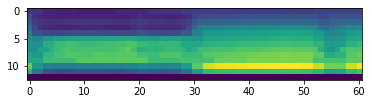

<AxesSubplot:>

In [36]:
show(df.X[0][:,:,12])

In [ ]:
# def create_dataset(folders, n = None): 
#     X = []
#     y = []
#     b_min =[]
#     b_mean =[]
#     b_median = []
#     b_max = []
#     for folder in folders:
#         files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
#         if n is None:
#             n = len(files_s)
#         for file in files_s[:n]:
#             img = rasterio.open(file)
#             X.append(img.read())
#             y.append(folder)
#             img.close()

#     data = {'X':X, 'y': y}
#     df = pd.DataFrame(data) 
#     return df

---
# array = img.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})
---
Ver2
# def create_dataset(folders, n = None): 
#     X = []
#     y = []
#     b_min =[]
#     b_mean =[]
#     b_median = []
#     b_max = []
#     for folder in folders:
#         files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
#         if n is None:
#             n = len(files_s)
#         for file in files_s[:n]:
#             img = rasterio.open(file)
#             array = img.read()
#             print(array.shape)
#             for band in array:
#                 b_min.append(band.min())
#                 b_mean.append(band.mean())
#                 b_median.append(np.median(band))
#                 b_max.append(band.max())
                
#             X.append(array)
#             y.append(folder)
#             img.close()

#     data = {'X':X,'min':b_min, 'mean':b_mean,'median':b_median,'max':b_max,'y': y}
#     print(len(b_min),len(b_mean),len(b_median),len(b_max), len(X), len(y))
#     df = pd.DataFrame(data) 
#     return df

#     data = {'X':X,'min':b_min, 'mean':b_mean,'median':b_median,'max':b_max,'y': y}

#     b_min =[]
#     b_mean =[]
#     b_median = []
#     b_max = []

# show(df.X[0][:,:,12])